Df: Videojuegos, historico 

Para este proyecto, se estara revisando el historico de ventas de videojuegos, tomando en cuenta plataforma, ventas por region y total, ratings de usuarios y criticos. La finalidad es tener el suficiente sustento para crear una campaña para el siguiente año (2017) con base en el historico. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
games = pd.read_csv("/datasets/games.csv")

In [3]:
games.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


De acuerdo a la informacion del df, no hay necesiadad de convertir el tipo de datos de las columnas debido a que son correctos. A excepcion de user_score porque se está considerando como un str cuando debe de ser un numero. Se puede observar que hay valores ausentes, por lo que hay que tratar eso. 

In [4]:
print(type(games))
print(games.shape)


<class 'pandas.core.frame.DataFrame'>
(16715, 11)


In [5]:
games.columns = games.columns.str.lower()
print(games.head())



                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [6]:
missing_values = games.isna().sum()

print(missing_values)


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [7]:
null_values = games.isnull().sum()
print(null_values)

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


Hay varias columna donde existen valores ausentes, dependiente del tipo de informacion, se tendra que lidiar con esos valores de una forma en especifico. 

En el caso de year, la mejor opcion seria eliminar los valores ausentes porque no son muchos. En el caso de critir y user score sera mejor ocupar la mediana, por la cantidad de valores ausentes y para evitar valore atipicos. En el caso de rating, se ocupara TDB para los valores ausentes. 

In [8]:
games = games.dropna(subset=["year_of_release"])
games["year_of_release"] = games["year_of_release"].astype("float64") 

In [9]:
critic_median = games["critic_score"].median()
games["critic_score"].fillna(critic_median, inplace=True)

games["user_score"] = games["user_score"].replace("tbd", np.nan)
games["user_score"] = pd.to_numeric(games["user_score"])

user_median = games["user_score"].median()
games["user_score"].fillna(user_median, inplace=True)

games["rating"].fillna("TBD", inplace=True)


In [10]:
games["name"] = games["name"].dropna()
games["genre"] = games["genre"].dropna()

In [11]:
missing_values_2 = games.isna().sum()

print(missing_values_2)

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [12]:
null_values2 = games.isnull().sum()
print(null_values2)

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [13]:
games["total_sales"] = (games["na_sales"] +
                       games["eu_sales"] +
                       games["jp_sales"] +
                       games["other_sales"])

In [14]:
print(games.head(20))

                                            name platform  year_of_release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS       

In [15]:
print(games["year_of_release"].unique())

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983.]


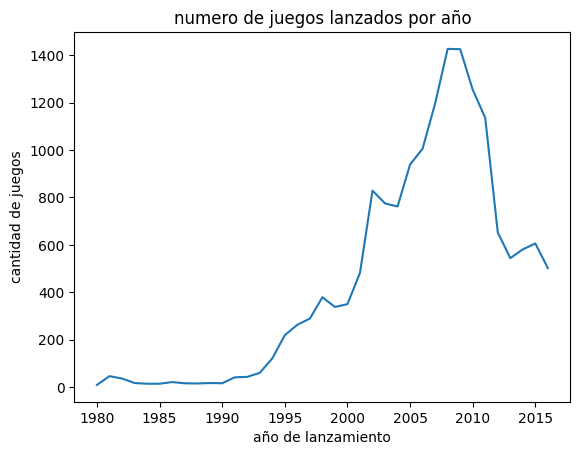

In [16]:
release_per_year = games.groupby("year_of_release")["name"].count()

release_per_year.plot(x="year_of_release",
                      title="numero de juegos lanzados por año",
                      xlabel="año de lanzamiento",
                      ylabel="cantidad de juegos")
plt.show()
                      

In [17]:
sales_per_plat = games.groupby("platform")["total_sales"].sum()
sales_per_plat = sales_per_plat.sort_values(ascending=False)


In [18]:
print(sales_per_plat)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


En ventas totales, el top 10 de plataformas son ps2, xbox 360, ps3, wii, nintendo ds, ps, ps4, gba, psp y nintendo 3ds. 

In [19]:
print(sales_per_plat.head(10))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


Paso 3, ejercicio 1 

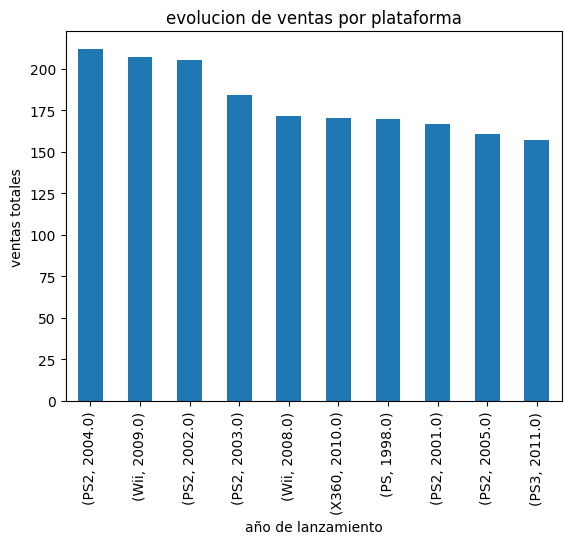

In [20]:
sales_per_year = games.groupby(["platform", "year_of_release"])["total_sales"].sum()
sales_per_year = sales_per_year.sort_values(ascending=False).head(10)
sales_per_year.plot(kind="bar",
                   xlabel="año de lanzamiento",
                   ylabel="ventas totales",
                   title="evolucion de ventas por plataforma")
plt.show()

Paso 3, ejercicio 2 

In [24]:
x = games.groupby("platform")["year_of_release"].agg(["min", "max"]).reset_index()
x["dif"] = x["max"] - x["min"]

x.head()


,platform,min,max,dif
0,2600,1980.0,1989.0,9.0
1,3DO,1994.0,1995.0,1.0
2,3DS,2011.0,2016.0,5.0
3,DC,1998.0,2008.0,10.0
4,DS,1985.0,2013.0,28.0


In [21]:
first_year_sale = games.groupby("platform")["year_of_release"].min()
last_year_sale = games.groupby("platform")["year_of_release"].max()
platform_life = pd.DataFrame({"first_year": first_year_sale, "last_year": last_year_sale})
platform_life["lifespan"] = platform_life["last_year"] - platform_life["first_year"]

print(platform_life.sort_values("lifespan", ascending=True))


          first_year  last_year  lifespan
platform                                 
GG            1992.0     1992.0       0.0
PCFX          1996.0     1996.0       0.0
TG16          1995.0     1995.0       0.0
3DO           1994.0     1995.0       1.0
SCD           1993.0     1994.0       1.0
WS            1999.0     2001.0       2.0
NG            1993.0     1996.0       3.0
XOne          2013.0     2016.0       3.0
PS4           2013.0     2016.0       3.0
GEN           1990.0     1994.0       4.0
WiiU          2012.0     2016.0       4.0
PSV           2011.0     2016.0       5.0
3DS           2011.0     2016.0       5.0
SAT           1994.0     1999.0       5.0
N64           1996.0     2002.0       6.0
GC            2001.0     2007.0       6.0
GBA           2000.0     2007.0       7.0
XB            2000.0     2008.0       8.0
SNES          1990.0     1999.0       9.0
2600          1980.0     1989.0       9.0
PS            1994.0     2003.0       9.0
PS3           2006.0     2016.0   

Se pueden observar las plataformas que no tuvieron exito en las ventas de manera continua. Por ejemplo GG, PCFX TG16 solo tuvieron ventas en el año en el que fueron lanzados. En contraste, PC lleva 31 años con ventas continuas. Con base en estos resultados, se tomaran en cuenta las consolas que han tenido ventas en los últimos 10 años. La industria de los videojuegos es muy cambiante y cada año salen nuevas tecnologías. Esta es la razon de elegir 10 años. 

Paso 3, ejercicio 3

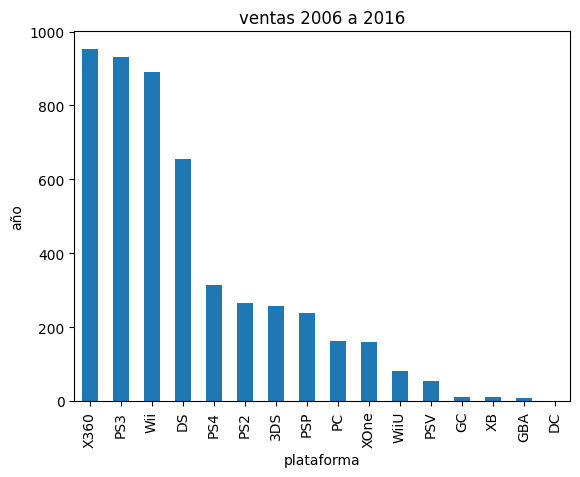

In [22]:
filt_games = games[(games["year_of_release"] >= 2006) & (games["year_of_release"] <= 2016)]
sales_2006_2016 = filt_games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)

sales_2006_2016.plot(kind="bar",
                    xlabel="plataforma",
                    ylabel="año",
                    title="ventas 2006 a 2016")
plt.show()


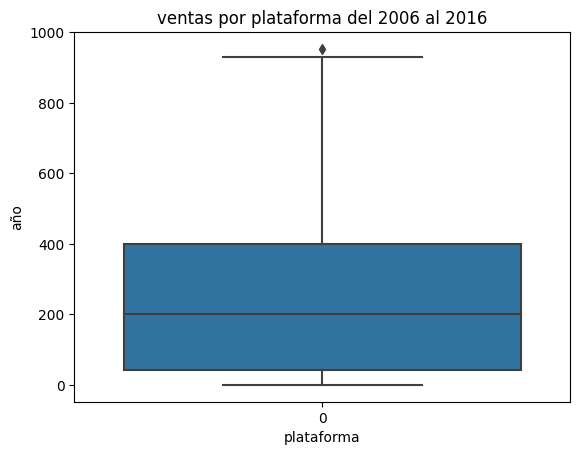

In [23]:
sns.boxplot(data=sales_2006_2016)
plt.title("ventas por plataforma del 2006 al 2016")
plt.xlabel("plataforma")
plt.ylabel("año")
plt.show()

Se puede observar que la media de ventas entre 2006 y 2016 es de 200 millones. El 75% de las plataformas ha registrado ventas entre 50 y 400 millones de pesos. 

Paso 3, ejercicio 4

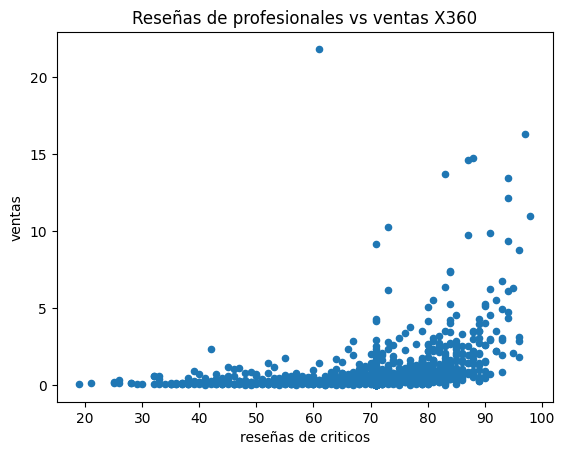

La correlacion entre reseñas de criticos y ventas es: 0.3606494835478315


In [24]:
xbox_games = games[games["platform"] == "X360"]

xbox_games.plot(kind="scatter",
               x="critic_score",
               y="total_sales",
               title="Reseñas de profesionales vs ventas X360",
               xlabel="reseñas de criticos",
               ylabel="ventas")

plt.show()

correlation_critic = xbox_games["critic_score"].corr(xbox_games["total_sales"])
print("La correlacion entre reseñas de criticos y ventas es:", correlation_critic)


Para las reseñas de los criticos en el Xbox 360, mientras mejor es la reseña, mas ventas hay. Sin embargo, le relacion entre las dos variables no es tan fuerte. 

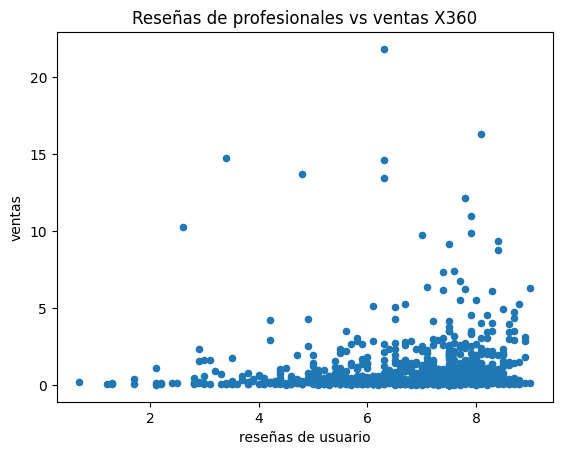

La correlacion entre reseñas de usuario y ventas es: 0.3606494835478315


In [25]:
xbox_games.plot(kind="scatter",
               x="user_score",
               y="total_sales",
               title="Reseñas de profesionales vs ventas X360",
               xlabel="reseñas de usuario",
               ylabel="ventas")

plt.show()

correlation_user = xbox_games["user_score"].corr(xbox_games["total_sales"])
print("La correlacion entre reseñas de usuario y ventas es:", correlation_critic)

En el caso de las reseñas de los usuarios, el compartamiento es parecido. Mientras mejor es la reseña, mayor es la venta. De la misma forma, la relacion entre las dos variables no estan fuerte 

Paso 3, ejercicio 5 

In [26]:
gta = games[games["name"] == "Grand Theft Auto: San Andreas"]

gta_sales = gta.groupby("platform")["total_sales"].sum().reset_index()

print(gta_sales)

  platform  total_sales
0       PC         0.97
1      PS2        20.81
2     X360         0.11
3       XB         1.96


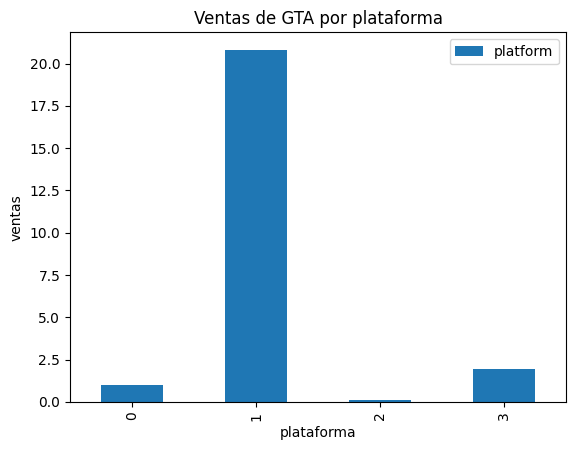

In [27]:
gta_sales.plot(kind="bar",
              title="Ventas de GTA por plataforma",
              xlabel="plataforma",
              ylabel="ventas")

plt.legend(["platform"])

plt.show()

Se puede observar que GTA San Andreas tiene una plataforma estrella, el PS2 donde se han registrado la mayor cantidad de ventas globales desde que el juego se lanzó. Despues, sigue el xbox. El PS2 se registraron 20 millones de ventas y en xbox 2.5 millones.

Paso 3, ejercio 6 

In [28]:
sales_per_genre = games.groupby("genre")["total_sales"].sum().reset_index()
print(sales_per_genre)

           genre  total_sales
0         Action      1716.52
1      Adventure       233.33
2       Fighting       442.66
3           Misc       790.29
4       Platform       825.55
5         Puzzle       239.89
6         Racing       723.49
7   Role-Playing       931.08
8        Shooter      1041.36
9     Simulation       387.96
10        Sports      1309.67
11      Strategy       172.57


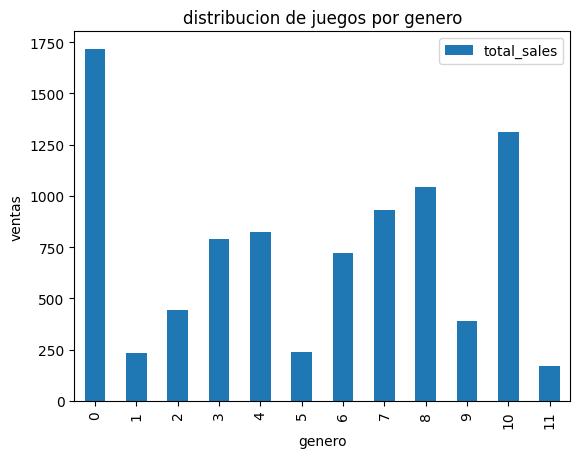

In [29]:
sales_per_genre.plot(kind="bar",
                    title="distribucion de juegos por genero",
                    ylabel="ventas",
                    xlabel="genero")


plt.show()

Como se puede observar, que el genero que mas ha tenido ventas es accion seguido de deportes.

Paso 4, ejercio 1

In [30]:
top_platforms_na = games.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5)
top_platforms_eu = games.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5)
top_platforms_jp = games.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5)

In [31]:
print("Top 5 plataformas en NA:", top_platforms_na)
print("Top 5 plataformas en EU:", top_platforms_eu)
print("Top 5 plataformas en JP:", top_platforms_jp)

Top 5 plataformas en NA: platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64
Top 5 plataformas en EU: platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64
Top 5 plataformas en JP: platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64


Se puede concluir que NA y EU comparten plataformas, sus gustos son similares en cuanto a la consola que ocupar para jugar. Japon, por otro lado, prefiere mas los productos de Nintendo y Playstation

In [32]:
top_genre_na = games.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head(5)
top_genre_eu = games.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head(5)
top_genre_jp = games.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head(5)

In [33]:
print("Top 5 generos en NA:", top_genre_na)
print("Top 5 generos en EU:", top_genre_eu)
print("Top 5 generos en JP:", top_genre_jp)

Top 5 generos en NA: genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64
Top 5 generos en EU: genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64
Top 5 generos en JP: genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


A lo largo de las tres regiones, el genero de accion es un comun denominador. En el caso de NA y EU, es es genero con mas ventas; para Japon, ocupa el segun lugar. Japon  tiene una mayor inclinacion por juegos de rol. 

In [34]:
esrb_na = games.groupby("rating")["na_sales"].sum().sort_values(ascending=False).head(5)
esrb_eu = games.groupby("rating")["eu_sales"].sum().sort_values(ascending=False).head(5)
esrb_jp = games.groupby("rating")["jp_sales"].sum().sort_values(ascending=False).head(5)

In [35]:
print("Ventas por clasificacion ESRB en NA:", esrb_na)
print("Ventas por clasificacion ESRB en EU:", esrb_eu)
print("Ventas por clasificacion ESRB en JP:", esrb_jp)

Ventas por clasificacion ESRB en NA: rating
E       1274.24
TBD     1227.62
T        747.60
M        742.89
E10+     345.50
Name: na_sales, dtype: float64
Ventas por clasificacion ESRB en EU: rating
E       703.87
TBD     610.18
M       480.00
T       421.79
E10+    183.35
Name: eu_sales, dtype: float64
Ventas por clasificacion ESRB en JP: rating
TBD     836.77
E       197.96
T       150.70
M        63.58
E10+     40.20
Name: jp_sales, dtype: float64


Es interesante ver como los juegos que aun no se clasifican, generan ventas. En el caso de JP, ocupa el puesto numero uno. Por otro lado, los juegos clasificados como E10+ son lo que menos ventas generan en las tres regiones 

Paso 5, ejercicio 1

Hipotesis cero: la media de calificaciones entre XONE y PC no son diferentes 
Hipotesis alternativa: la media de calificaciones entre XONE y PC son diferentes 

In [36]:
print(games["platform"].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [47]:
xbox_rating = games[games["platform"] == "XOne"]["user_score"]
pc_rating = games[games["platform"] == "PC"]["user_score"]

In [49]:
print(xbox_rating)
print(xbox_rating.isnull().sum())

99       7.5
165      7.9
179      5.4
242      6.4
270      6.2
        ... 
16630    8.2
16643    6.6
16645    7.5
16660    6.7
16672    7.5
Name: user_score, Length: 247, dtype: float64
0


In [50]:
alpha = 0.05 

result = st.ttest_ind(xbox_rating, pc_rating)

print('valor p:', result.pvalue)

if (result.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 9.043321920431166e-05
Rechazamos la hipótesis nula


In [39]:
print(games["genre"].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


In [51]:
act_rating = games[games["genre"] == "Action"]["user_score"]
spt_rating = games[games["genre"] == "Sports"]["user_score"]

In [52]:
alpha = 0.05 

result = st.ttest_ind(act_rating, spt_rating)

print('valor p:', result.pvalue)

if (result.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.5653256242787754
No podemos rechazar la hipótesis nula


Como conclusion en general, las regiones de NA y EU comparten gustos similares. Esto se puede observar en las plataformas que mas ventas han registrado ventas. De igual forma, los generos en relación a ventas totales son similares en las tres regiones; accion es el que se encuentra en los primeros lugares. Se delimito un periodo de 2006 a 2016 para estudiar a mayor detalle las ventas, esto porque un periodo de 10 años demuestra la solidez, o no, de una plataforma a lo largo del tiempo. En ese espacio de tiempo, las ventas promedio fueron de 200 millones de pesos por plataforma. 
Por otro lado, las ratings de usuarios y criticos tienen un efecto positivo en las ventas, sin embargo su impacto no es muy grande. 
Por ultimo, se estudió las calificaciones entre PC y Xbox, se determinó que la media de calificaciones son diferentes, es decir que los juegos han tenido un diferente impacto. 
Se hizo lo mismo para los generos de accion y deportes, donde se determinó que no se puede rechazar la hipotesis nula. 